In [120]:
import cv2
from PIL import Image
import numpy as np
import os
import pyocr
import pyocr.builders
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import extract_text

In [140]:
def hist(img):
    mask = extract_text.extract_white(img)
    rects = extract_text.get_rects(mask)
    text_area = extract_text.cut_out_text(rects, mask, 7000)
    text_area = cv2.resize(text_area, (150, 150))
    m_sum = np.sum(text_area/255, axis=0)
    m_sum /= max(m_sum)
    return m_sum, text_area

In [168]:
img = cv2.imread('images00/image52.jpg')

In [169]:
img_p = cv2.imread('images00/image53.jpg')

In [170]:
img2 = cv2.imread('images00/image56.jpg')

* 元の画像（左）

* 文字領域のみを抽出して150×150にリサイズした画像（真ん中）

* 文字領域のみ抽出した画像の縦方向の同じ色の画素数の和のヒストグラム（右）

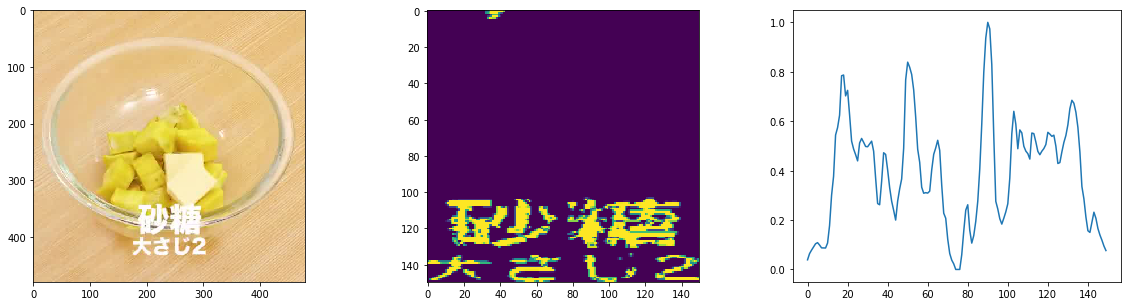

In [171]:
x, text_area = hist(img)
_, (axL, axC, axR) = plt.subplots(ncols=3, figsize=(20,5))
axL.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axC.imshow(text_area)
axR.plot(x)

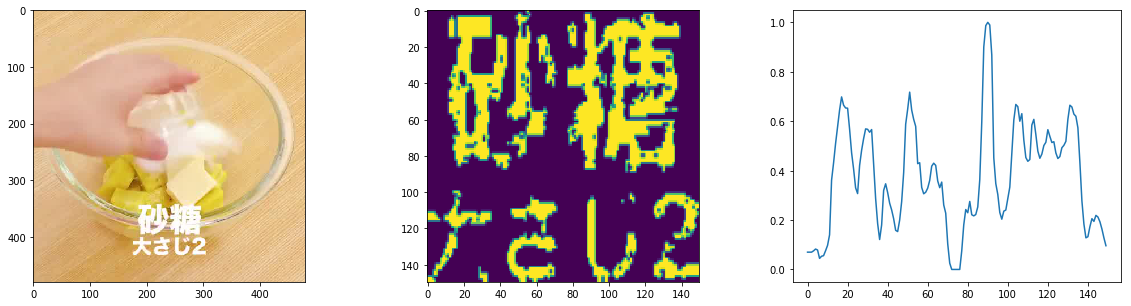

In [172]:
x_p, text_area = hist(img_p)
_, (axL, axC, axR) = plt.subplots(ncols=3, figsize=(20,5))
axL.imshow(cv2.cvtColor(img_p, cv2.COLOR_BGR2RGB))
axC.imshow(text_area)
axR.plot(x_p)

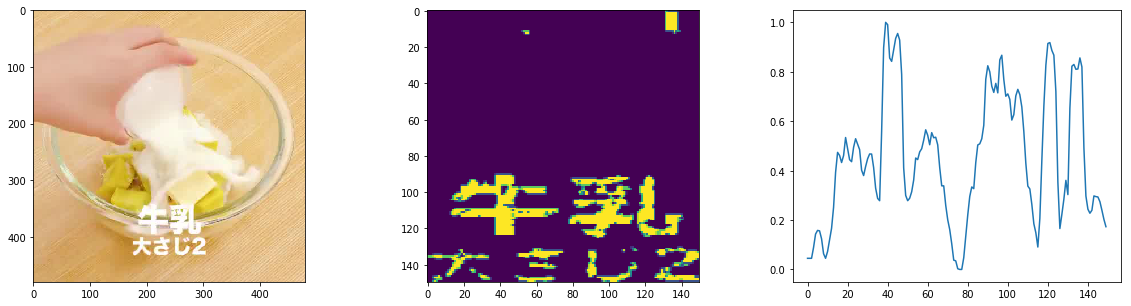

In [173]:
y, text_area = hist(img2)
_, (axL, axC, axR) = plt.subplots(ncols=3, figsize=(20,5))
axL.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axC.imshow(text_area)
axR.plot(y)

In [174]:
# １枚目（砂糖）と３枚目（牛乳）の文字領域の縦方向の画素の和のヒストグラムの相関
np.corrcoef(x, y)[0, 1]

0.45575353955014064

In [176]:
# １枚目（砂糖）と２枚目（砂糖）の文字領域の縦方向の画素の和のヒストグラムの相関
np.corrcoef(x, x_p)[0, 1]

0.95986632059836829

１枚目と３枚目は一見似ているが、相関は約0.456
したがって、文字が変化したことがわかる。

１枚目と２枚目は文字は同じものの、１枚目はノイズが乗ってしまっているために切り出された画像としては異なる。
しかし、相関は約0.960
したがって、文字が変化していないことがわかる。